In [61]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем библиотеки для анализа данных numpy, pandas) и для построения графиков

In [62]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')


In [84]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv') 
# загружаем датасет

# Визуализация данных

Краткое описание признаков:

Age : возраст пациента

Sex : пол пациента

exang: стенокардия из-за физической наргузки (1 = да; 0 = нет)

ca: количество крупных сосудов (0-3)

cp : тип грудной боли

Value 1: типичная стенокардия
Value 2: нетипичная стенокардия
Value 3: боль без стенокардии
Value 4: бессимптомная боль

trtbps : артериальное давление в покое (in mm Hg)

chol : холестерин в мг

fbs : (уровень сахара в крови натощак > 120 мг/дл(децилитр)) (1 = true; 0 = false)

rest_ecg : электрокардиография в покое

Value 0: нормальное значение
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [64]:
# предпросмотр данных
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
df.shape

(303, 14)

In [67]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
df.info()
# нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
df.shape

(303, 14)

In [70]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

поделим датасет на категориальные и некатегориальные величины

In [71]:
cat_cols = df[['sex','exng','caa','cp','fbs','restecg','slp','thall', 'output']]
con_cols = df[['age','trtbps','chol', 'thalachh', 'oldpeak', 'output']]

Построим корреляционную матрицу для того, чтобы выявить ненужные признаки

In [72]:
px.imshow(con_cols.corr(), width=700, height=700)

если рассматривать только некатегориальные признками, очень низкую корреляцию как с outut, так и с другими признакми, будет иметь параметр oldpeak. Более того, он почти не коррелирует с thalach, который, коррелирует с Output более других

In [73]:
px.imshow(cat_cols.corr(), width=700, height=700)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


In [83]:
fig=px.histogram(df, 
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 barmode="group")
fig.show()

In [76]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

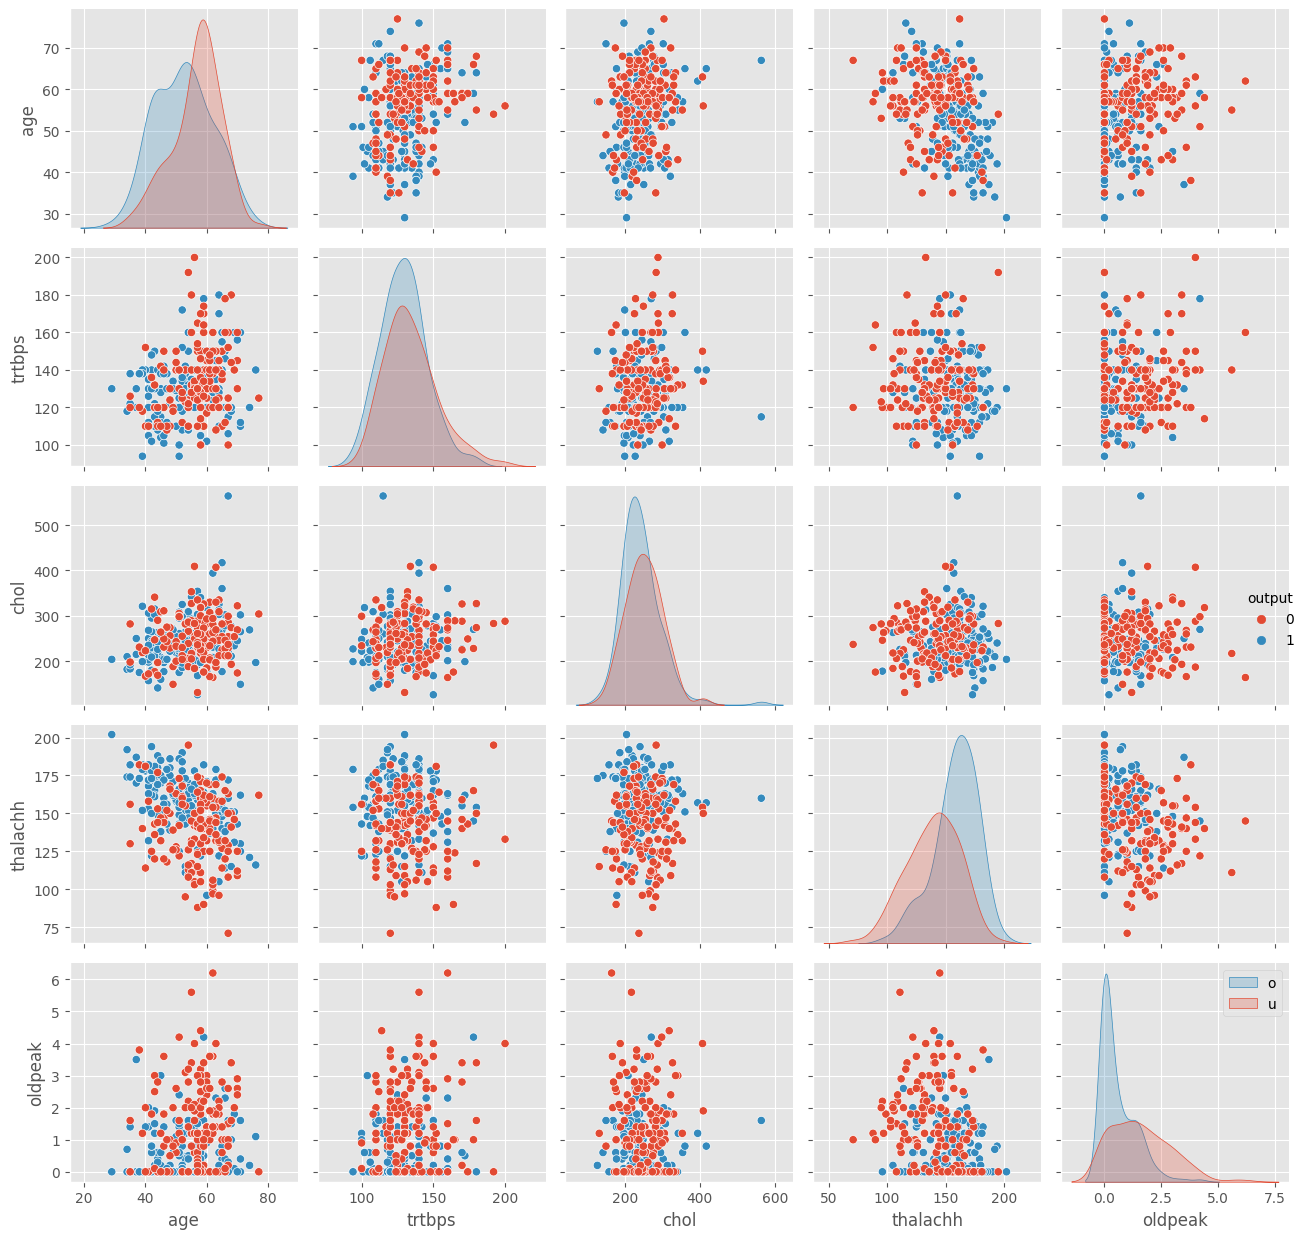

In [77]:
plt.figure(figsize=(15,10))
sns.pairplot(con_cols,hue="output")
plt.legend("output")
plt.tight_layout()
plt.plot()

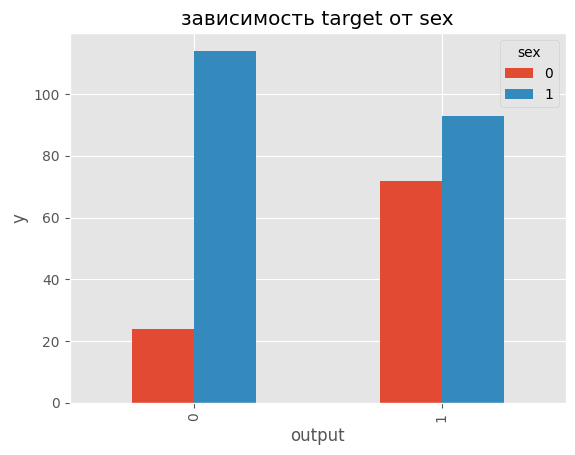

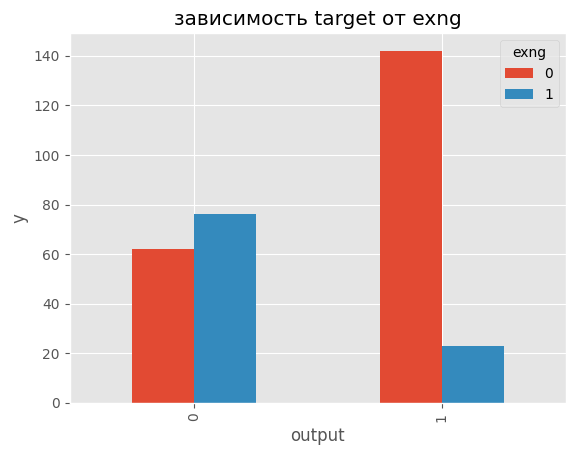

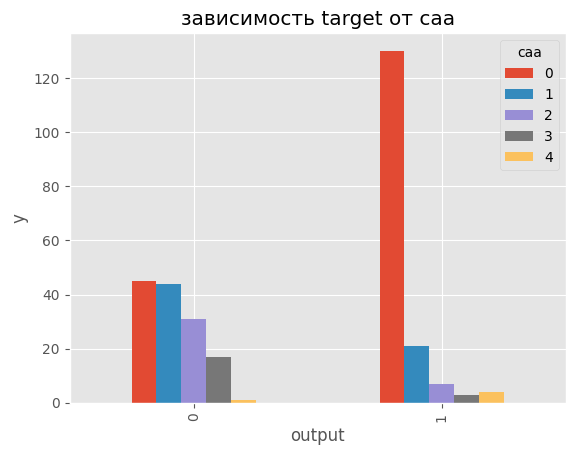

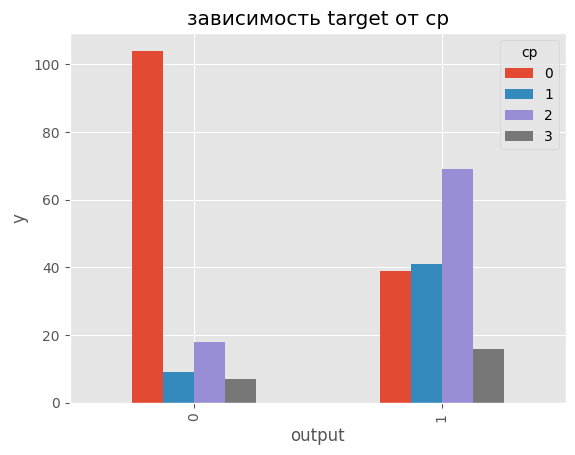

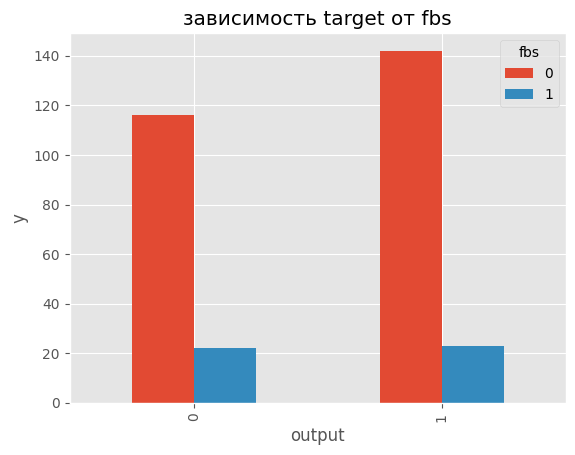

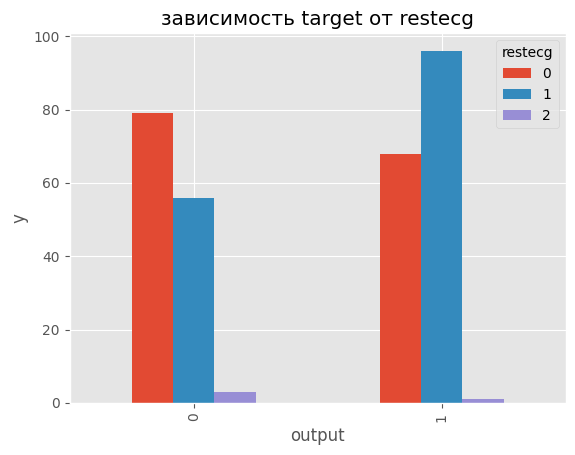

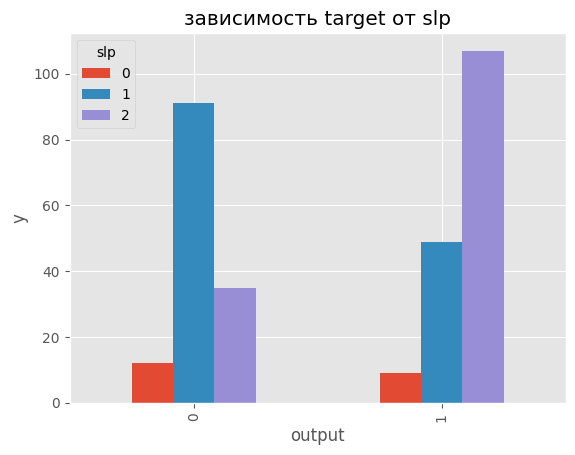

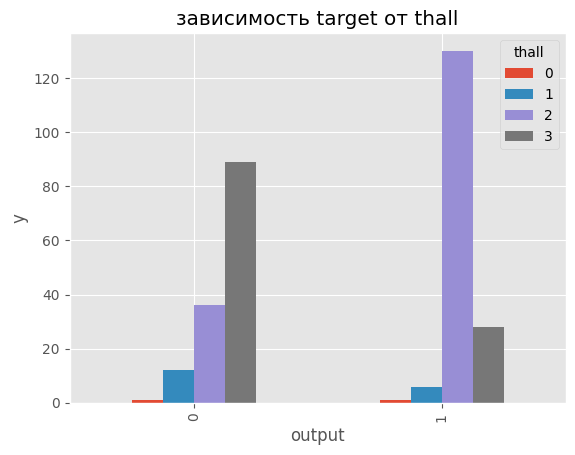

In [78]:
%matplotlib inline
cat_cols = df[['sex','exng','caa','cp','fbs','restecg','slp','thall']]

for col in cat_cols:
  pd.crosstab(df.output, df[col]).plot(kind='bar')
  plt.title(f"зависимость target от {col}")
  plt.xlabel('output')
  plt.ylabel('y')
  plt.savefig('purchase_fre_job')



# Подготовка данных


Как было упомянуто ранее, пустых ячеек нет

In [86]:
df = df.drop(columns='oldpeak')
#убираем oldpeak из-за низкой корреляции с таргетом

# Обработка данных

In [90]:
from sklearn.model_selection import train_test_split # импорт функции для тестовой выборки

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['output'], axis=1), # убираем output, axis = 1 - колонка
    df.output,
    test_size= 0.2,  # тестовая выборка - 20 %
    random_state=0, # воспроизведение вывода через вывод нескольких функций
    shuffle = True, # перемешивание значений
    stratify=df.output # основной вывод
)

In [91]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
acc=accuracy_score(y_test, Y_pred)
print('Accuracy is',round(acc,2)*100,'%')

Accuracy is 87.0 %
